#**1. Data Source and Contents**

In [1]:
# install xgboost package
pip install xgboost

In [2]:
# import necessary packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import census data
census = pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')
census.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


##Clean the census data

In [0]:
# divide our dataset into train and test set
# we want to drop education_num_bin and workclass_bin along with the flag column
train = census[census["flag"]=="train"].drop(["flag","education_num_bin","workclass_bin"],axis=1)
test = census[census["flag"]=="test"].drop(["flag","education_num_bin","workclass_bin"],axis=1)
x_train = train.drop("y",axis=1)
y_train = train["y"]
x_test = test.drop("y",axis=1)
y_test = test["y"]

# create dummy variables for each of the categorical columns using OneHotEncoder
encoder = OneHotEncoder(drop='first')
x_train = encoder.fit_transform(x_train).toarray()
x_test = encoder.fit_transform(x_test).toarray()

#**3. Building a Random Forest Model**

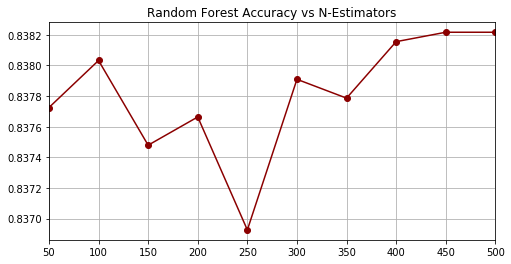

In [4]:
# create a list to store accuracy scores
accuracies = []
# create a list to store all the n_estimator values we want to test
n_estimators = [50,100,150,200,250,300,350,400,450,500]

# create a for loop that instantiates a different random forest classifier
# and calculates the accuracy for each n_estimator in the list defined above
for n in n_estimators:
    model = RandomForestClassifier(n_estimators=n, random_state=101) # initialize a random_state so results can be reproduced/consistent
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    accuracies.append(accuracy)

# visualize the accuracy for each n_estimator value
plt.figure(figsize=(8,4))
pd.Series(accuracies, n_estimators).plot(color='darkred',marker='o')
plt.title('Random Forest Accuracy vs N-Estimators')
plt.grid()
plt.show()

#**4. Building AdaBoost, Gradient Boost (classifier) and XGB model**

## Ada-Boost Classifier

In [0]:
# import necessary packages
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

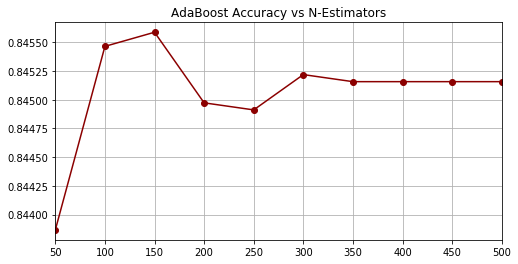

In [6]:
# create a list to store accuracy scores
accuracies2 = []
# create a for loop that instantiates a different AdaBoost classifier
# and calculates the accuracy for each n_estimator in the list defined above
for n in n_estimators:
    model = AdaBoostClassifier(n_estimators=n, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    accuracies2.append(accuracy)

# visualize the accuracy for each n_estimator value
plt.figure(figsize=(8,4))
pd.Series(accuracies2, n_estimators).plot(color='darkred',marker='o')
plt.title('AdaBoost Accuracy vs N-Estimators')
plt.grid()
plt.show()

## Gradient Boost Classifier

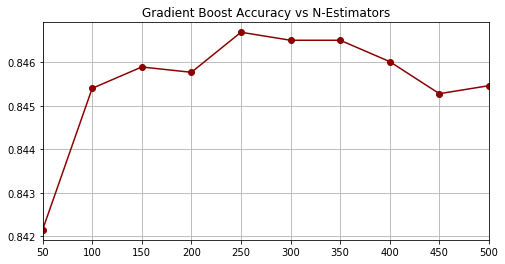

In [7]:
# create a list to store accuracy scores
accuracies3 = []
# create a for loop that instantiates a different Gradient Boost classifier
# and calculates the accuracy for each n_estimator in the list defined above
for n in n_estimators:
    model = GradientBoostingClassifier(n_estimators=n, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    accuracies3.append(accuracy)

# visualize the accuracy for each n_estimator value
plt.figure(figsize=(8,4))
pd.Series(accuracies3, n_estimators).plot(color='darkred',marker='o')
plt.title('Gradient Boost Accuracy vs N-Estimators')
plt.grid()
plt.show()

## XG-Boost Classifier

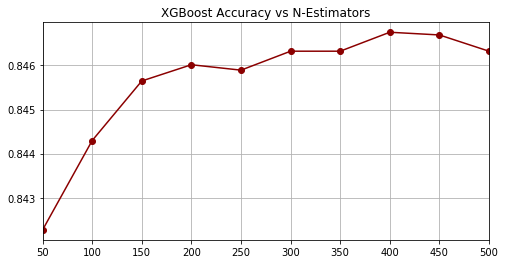

In [8]:
# create a list to store accuracy scores
accuracies4 = []
# create a for loop that instantiates a different XGB classifier
# and calculates the accuracy for each n_estimator in the list defined above
for n in n_estimators:
    model = XGBClassifier(n_estimators=n, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    accuracies4.append(accuracy)

# visualize the accuracy for each n_estimator value
plt.figure(figsize=(8,4))
pd.Series(accuracies4, n_estimators).plot(color='darkred',marker='o')
plt.title('XGBoost Accuracy vs N-Estimators')
plt.grid()
plt.show()

In [9]:
# we take the n_estimator with the best accuracy score for the random forest classifier
# and store it in a variable
best_n_estimator = 500
# instantiate all models using the best n estimator
rand_mod = RandomForestClassifier(n_estimators=best_n_estimator, random_state=101)
adab_mod = AdaBoostClassifier(n_estimators=best_n_estimator, random_state=101)
grad_mod = GradientBoostingClassifier(n_estimators=best_n_estimator, random_state=101)
xgbo_mod = XGBClassifier(n_estimators=best_n_estimator, random_state=101)

# fit the training set to all the models 
rand_mod.fit(x_train, y_train)
adab_mod.fit(x_train, y_train)
grad_mod.fit(x_train, y_train)
xgbo_mod.fit(x_train, y_train)

# predict the test set
y_pred_rand = rand_mod.predict(x_test)
y_pred_ada = adab_mod.predict(x_test)
y_pred_grad = grad_mod.predict(x_test)
y_pred_xg = xgbo_mod.predict(x_test)

#calculate accuracy scores
accuracy_rand = np.mean(y_test==y_pred_rand)
accuracy_ada = np.mean(y_test==y_pred_ada)
accuracy_grad = np.mean(y_test==y_pred_grad)
accuracy_xg = np.mean(y_test==y_pred_xg)

# store accuracy scores in a list
accuracies = [accuracy_rand, accuracy_ada, accuracy_grad, accuracy_xg]

#calculate AUC scores
auc_rand = roc_auc_score(y_test, y_pred_rand)
auc_ada = roc_auc_score(y_test, y_pred_ada)
auc_grad = roc_auc_score(y_test, y_pred_grad)
auc_xg = roc_auc_score(y_test, y_pred_xg)

# store AUC scores in a list
auc_scores = [auc_rand, auc_ada, auc_grad, auc_xg]

# create dataframe/table
n_estimators = [500, 500, 500, 500]
random_states = [101, 101, 101, 101]

pd.DataFrame.from_dict(data={'Accuracy': accuracies, 'AUC': auc_scores, 'n_estimators': n_estimators, 'Random State': random_states}, 
                       orient='index', columns=['Random Forest', 'AdaBoost', 'Gradient Boost', 'XGB'])

,Random Forest,AdaBoost,Gradient Boost,XGB
Accuracy,0.838216,0.845157,0.845464,0.846324
AUC,0.745836,0.746518,0.756956,0.758507
n_estimators,500.000000,500.000000,500.000000,500.000000
Random State,101.000000,101.000000,101.000000,101.000000
